---------- Start recognize license palate --------


PermissionDenied: 403 This API method requires billing to be enabled. Please enable billing on project #864034319058 by visiting https://console.developers.google.com/billing/enable?project=864034319058 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry.

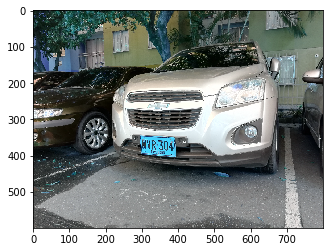

In [10]:
import io
import os
import cv2
from google.cloud import vision_v1p3beta1 as vision
from datetime import datetime
from matplotlib import pyplot as plt 
import pandas as pd
import json



# Setup google authen client key
with open('key.json', 'r') as f:
    key = json.load(f)
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="./key.json"

# Source path content all images
SOURCE_PATH = "./Photos/license_plate/"



def recognize_license_plate(img_path):
    
    start_time = datetime.now()

    # Read image with opencv
    img = cv2.imread(img_path)

    # Get image size
    height, width = img.shape[:2]

    # Scale image
    img = cv2.resize(img, (800, int((height * 800) / width)))

    # Show the origin image
    plt.imshow(img)

    # Save the image to temp file
    cv2.imwrite(SOURCE_PATH + "output.jpg", img)

    # Create new img path for google vision
    img_path = SOURCE_PATH + "output.jpg"

    # Create google vision client
    client = vision.ImageAnnotatorClient()

    # Read image file
    with io.open(img_path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    # Recognize text
    response = client.text_detection(image=image)
    texts = response.text_annotations

    for text in texts:
        if len(text.description) == 10:
            license_plate = text.description
            print(license_plate)
            vertices = [(vertex.x, vertex.y)
                        for vertex in text.bounding_poly.vertices]

            # Put text license plate number to image
            cv2.putText(img, license_plate, (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)

            print(vertices)
            # Draw rectangle around license plate
            cv2.rectangle(img, (vertices[0][0]-10, vertices[0][1]-10), (vertices[2][0]+10, vertices[2][1]+10), (0, 255, 0), 3)
            print('Total time: {}'.format(datetime.now() - start_time))
            cv2.imshow('Recognize & Draw', img)
            cv2.waitKey(0)


print('---------- Start recognize license palate --------')
path = SOURCE_PATH + '2.jpg'
recognize_license_plate(path)
print('---------- End ----------')
